In [1]:
# 1. Install needed packages
!pip install pandas numpy matplotlib scipy

# 2. Upload your file (choose "activities_cleaned 1.csv")
from google.colab import files
uploaded = files.upload()

# 3. Set filename (change if needed)
INPUT_CSV = list(uploaded.keys())[0]  # automatically use uploaded file name
SCATTER_PNG = "scatter_wind_vs_avg_speed.png"
HEATMAP_PNG = "correlation_heatmap.png"

# 4. Run analysis
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(INPUT_CSV)

# Extract numeric part from Wind Speed (Raw)
df['Wind Speed (Raw)'] = df['Wind Speed (Raw)'].astype(str).str.extract(r'(\d+)').astype(float)

# Select columns
cols = ["Average Speed", "Max. Speed", "Distance (Raw)", "Wind Speed (Raw)", "Temperature (Raw)", "Humidity (Raw)"]
data = df[cols].copy()
for c in data.columns:
    data[c] = pd.to_numeric(data[c], errors="coerce")

# Drop rows missing key columns
data = data.dropna(subset=["Average Speed", "Wind Speed (Raw)"])

if len(data) < 2:
    print(f"Not enough rows for correlation: {len(data)}")
else:
    # Pearson & Spearman
    pearson_corr, _ = pearsonr(data["Wind Speed (Raw)"], data["Average Speed"])
    spearman_corr, _ = spearmanr(data["Wind Speed (Raw)"], data["Average Speed"])
    print(f"Pearson correlation: {pearson_corr:.3f}")
    print(f"Spearman correlation: {spearman_corr:.3f}")

    # Scatter plot
    plt.figure(figsize=(7,5))
    plt.scatter(data["Wind Speed (Raw)"], data["Average Speed"])
    m, b = np.polyfit(data["Wind Speed (Raw)"], data["Average Speed"], 1)
    x_vals = np.linspace(data["Wind Speed (Raw)"].min(), data["Wind Speed (Raw)"].max(), 100)
    plt.plot(x_vals, m*x_vals + b, color='red')
    plt.title(f"Wind Speed vs Average Speed\nPe


SyntaxError: unterminated string literal (detected at line 49) (ipython-input-1492865166.py, line 49)

In [2]:
# Install packages
!pip install pandas numpy matplotlib scipy

# Upload your CSV (choose activities_cleaned 1.csv)
from google.colab import files
uploaded = files.upload()

# Use uploaded filename automatically
INPUT_CSV = list(uploaded.keys())[0]
SCATTER_PNG = "scatter_wind_vs_avg_speed.png"
HEATMAP_PNG = "correlation_heatmap.png"

import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(INPUT_CSV)

# Extract numeric wind speed (remove direction letters)
df['Wind Speed (Raw)'] = df['Wind Speed (Raw)'].astype(str).str.extract(r'(\d+)').astype(float)

# Select relevant columns
cols = ["Average Speed", "Max. Speed", "Distance (Raw)",
        "Wind Speed (Raw)", "Temperature (Raw)", "Humidity (Raw)"]
data = df[cols].copy()
for c in data.columns:
    data[c] = pd.to_numeric(data[c], errors="coerce")

# Drop rows missing essential values
data = data.dropna(subset=["Average Speed", "Wind Speed (Raw)"])

if len(data) < 2:
    print(f"Not enough rows for correlation: {len(data)}")
else:
    # Pearson & Spearman correlations
    pearson_corr, _ = pearsonr(data["Wind Speed (Raw)"], data["Average Speed"])
    spearman_corr, _ = spearmanr(data["Wind Speed (Raw)"], data["Average Speed"])
    print(f"Pearson correlation: {pearson_corr:.3f}")
    print(f"Spearman correlation: {spearman_corr:.3f}")

    # Scatter plot with trendline
    plt.figure(figsize=(7,5))
    plt.scatter(data["Wind Speed (Raw)"], data["Average Speed"], alpha=0.6)
    m, b = np.polyfit(data["Wind Speed (Raw)"], data["Average Speed"], 1)
    x_vals = np.linspace(data["Wind Speed (Raw)"].min(), data["Wind Speed (Raw)"].max(), 100)
    plt.plot(x_vals, m*x_vals + b, color='red')
    plt.title(f"Wind Speed vs Average Speed\nPearson={pearson_corr:.2f}, Spearman={spearman_corr:.2f}")
    plt.xlabel("Wind Speed (km/h)")
    plt.ylabel("Average Speed (m/s)")
    plt.tight_layout()
    plt.savefig(SCATTER_PNG)
    plt.show()

    # Correlation heatmap
    corr_df = data.corr(numeric_only=True)
    labels = corr_df.columns.tolist()
    corr = corr_df.values
    plt.figure(figsize=(8,6))
    plt.imshow(corr, interpolation="nearest", cmap="coolwarm")
    plt.xticks(range(len(labels)), labels, rotation=45, ha="right")
    plt.yticks(range(len(labels)), labels)
    for i in range(len(labels)):
        for j in range(len(labels)):
            plt.text(j, i, f"{corr[i,j]:.2f}", ha="center", va="center", color="black")
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.savefig(HEATMAP_PNG)
    plt.show()

    # Let user download the plots
    files.download(SCATTER_PNG)
    files.download(HEATMAP_PNG)


Saving activities_cleaned 1.csv to activities_cleaned 1.csv
Not enough rows for correlation: 0


In [3]:
# Install packages
!pip install pandas numpy matplotlib scipy

# Upload your CSV (pick: activities_cleaned 1.csv)
from google.colab import files
uploaded = files.upload()

# Use uploaded file
INPUT_CSV = list(uploaded.keys())[0]
SCATTER_PNG = "scatter_wind_vs_avg_speed.png"
HEATMAP_PNG = "correlation_heatmap.png"

import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt

# Load
df = pd.read_csv(INPUT_CSV)

# --- Clean wind speed: keep numeric part (e.g., "11 S" -> 11.0) ---
df['Wind_kmh'] = (
    df['Wind Speed (Raw)']
    .astype(str)
    .str.extract(r'(\d+\.?\d*)')[0]
    .astype(float)
)

# --- Build a numeric Average Speed (km/h) ---
def pace_to_kmh(p):
    """Convert 'mm:ss' pace to km/h. Returns NaN if not pace."""
    try:
        s = str(p)
        if ':' not in s:
            return np.nan
        m, sec = s.split(':', 1)
        m = float(m); sec = float(sec)
        pace_min_per_km = m + sec/60.0
        if pace_min_per_km == 0:
            return np.nan
        return 60.0 / pace_min_per_km
    except Exception:
        return np.nan

# Try to parse "Average Speed" as pace first (e.g., "6:47"). If that fails, treat as numeric.
avg_from_pace = df['Average Speed'].apply(pace_to_kmh) if 'Average Speed' in df.columns else np.nan

# Fallback: compute from Distance / Duration
dist_km = pd.to_numeric(df['Distance (Raw)'], errors='coerce')
dur_h = pd.to_timedelta(df['Duration (h:m:s)'], errors='coerce').dt.total_seconds() / 3600.0
avg_from_dist = dist_km / dur_h

# Final AvgSpeed in km/h
df['AvgSpeed_kmh'] = pd.to_numeric(df.get('Average Speed', np.nan), errors='coerce')
df['AvgSpeed_kmh'] = df['AvgSpeed_kmh'].where(~df['AvgSpeed_kmh'].isna(), avg_from_pace)
df['AvgSpeed_kmh'] = df['AvgSpeed_kmh'].where(~df['AvgSpeed_kmh'].isna(), avg_from_dist)

# --- Build analysis frame ---
keep_cols = ['AvgSpeed_kmh','Wind_kmh','Temperature (Raw)','Humidity (Raw)']
data = df[keep_cols].copy()
data = data.dropna(subset=['AvgSpeed_kmh','Wind_kmh'])

print("Rows available for correlation:", len(data))
if len(data) < 2:
    print("Still not enough rows. Check that your CSV has Wind Speed and either pace or distance+duration for the same activities.")
else:
    # Correlations
    pearson_corr, _ = pearsonr(data['Wind_kmh'], data['AvgSpeed_kmh'])
    spearman_corr, _ = spearmanr(data['Wind_kmh'], data['AvgSpeed_kmh'])
    print(f"Pearson (wind vs avg speed): {pearson_corr:.3f}")
    print(f"Spearman (wind vs avg speed): {spearman_corr:.3f}")

    # Scatter + trendline
    plt.figure(figsize=(7,5))
    plt.scatter(data['Wind_kmh'], data['AvgSpeed_kmh'], alpha=0.6)
    m, b = np.polyfit(data['Wind_kmh'], data['AvgSpeed_kmh'], 1)
    x = np.linspace(data['Wind_kmh'].min(), data['Wind_kmh'].max(), 100)
    plt.plot(x, m*x + b)
    plt.title(f"Wind Speed vs Avg Speed\nPearson={pearson_corr:.2f}, Spearman={spearman_corr:.2f}")
    plt.xlabel("Wind Speed (km/h)")
    plt.ylabel("Average Speed (km/h)")
    plt.tight_layout()
    plt.savefig(SCATTER_PNG)
    plt.show()

    # Heatmap (matplotlib only)
    corr_df = data.rename(columns={
        'AvgSpeed_kmh':'Avg Speed (km/h)',
        'Wind_kmh':'Wind (km/h)'
    }).corr(numeric_only=True)
    labels = corr_df.columns.tolist()
    M = corr_df.values
    plt.figure(figsize=(8,6))
    plt.imshow(M, interpolation='nearest')
    plt.xticks(range(len(labels)), labels, rotation=45, ha='right')
    plt.yticks(range(len(labels)), labels)
    for i in range(len(labels)):
        for j in range(len(labels)):
            plt.text(j, i, f"{M[i,j]:.2f}", ha='center', va='center')
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.savefig(HEATMAP_PNG)
    plt.show()

    # Offer downloads
    from google.colab import files
    files.download(SCATTER_PNG)
    files.download(HEATMAP_PNG)


IndexError: list index out of range

Saving activities_cleaned 1.csv to activities_cleaned 1 (1).csv
Rows total: 155
Non-null counts:
AvgSpeed_kmh    155
Wind_kmh        155
Temperature     155
Humidity        155
dtype: int64
Rows available for correlation (after cleaning): 155
Pearson (wind vs avg speed):  0.122
Spearman (wind vs avg speed): 0.088


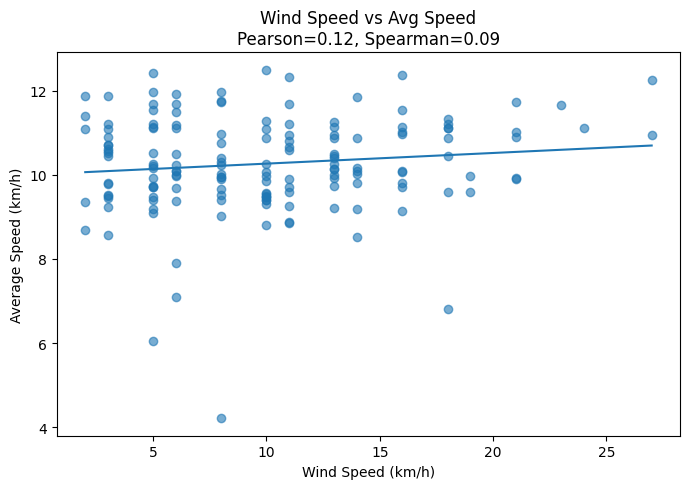

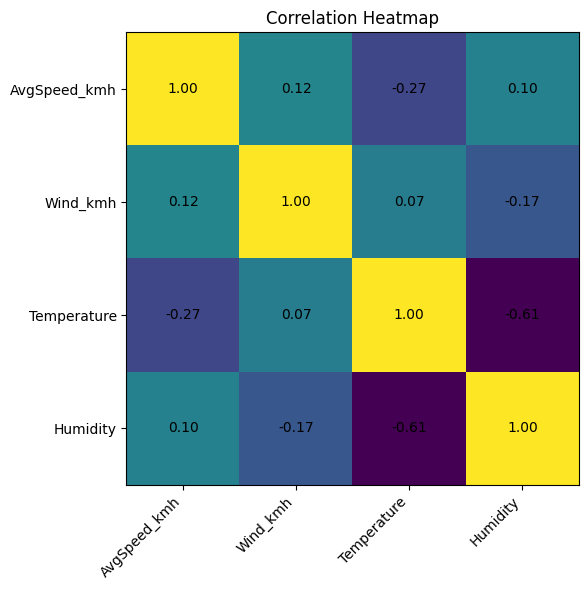

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
# 0) Install deps
!pip install pandas numpy matplotlib scipy openpyxl --quiet

# 1) Upload your file (CSV or XLSX)
from google.colab import files
uploaded = files.upload()
FNAME = list(uploaded.keys())[0]   # use whichever you uploaded

import pandas as pd, numpy as np, re
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt

# -------- Helpers --------
def read_any(fname):
    if fname.lower().endswith(('.xlsx', '.xls')):
        # try first sheet
        return pd.read_excel(fname)
    return pd.read_csv(fname)

def first_existing(df, candidates):
    """Return first existing column name from a candidate list (case-insensitive)."""
    cols_lower = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in cols_lower:
            return cols_lower[cand.lower()]
    return None

def pace_to_kmh(val):
    """Convert 'm:ss' or 'mm:ss' pace to km/h; return NaN if not pace-like."""
    s = str(val)
    if ':' not in s:
        return np.nan
    try:
        m, sec = s.split(':', 1)
        m = float(m); sec = float(sec)
        pace_min_per_km = m + sec/60.0
        if pace_min_per_km <= 0:
            return np.nan
        return 60.0 / pace_min_per_km
    except:
        return np.nan

# -------- Load --------
df = read_any(FNAME)

# -------- Find columns (be flexible with names) --------
col_dist   = first_existing(df, ["Distance (Raw)", "Distance", "Total Distance", "Total_Distance"])
col_dur    = first_existing(df, ["Duration (h:m:s)", "Duration", "Moving Duration (h:m:s)"])
col_avg    = first_existing(df, ["Average Speed", "Avg Speed", "AvgSpeed", "Average_Speed"])
col_wind   = first_existing(df, ["Wind Speed (Raw)", "Wind Speed", "Wind"])
col_temp   = first_existing(df, ["Temperature (Raw)", "Temperature"])
col_hum    = first_existing(df, ["Humidity (Raw)", "Humidity"])

needed_for_speed = [col_dist, col_dur]
if col_wind is None:
    raise ValueError("Couldn't find a wind speed column. Look for a column like 'Wind Speed (Raw)' or 'Wind Speed'.")

# -------- Clean wind (get numeric part only) --------
wind = (
    df[col_wind]
    .astype(str)
    .str.extract(r'(\d+\.?\d*)')[0]  # grab leading number like '11', '12.5'
    .astype(float)
    .rename("Wind_kmh")
)

# -------- Build AvgSpeed_kmh, trying 3 ways --------
avg_speed = pd.Series(np.nan, index=df.index, dtype=float)

# (A) If Average Speed is pace like '6:47', convert to km/h
if col_avg is not None:
    # try as numeric first (already in km/h)
    avg_numeric = pd.to_numeric(df[col_avg], errors="coerce")
    avg_from_pace = df[col_avg].apply(pace_to_kmh)
    avg_speed = avg_numeric.where(~avg_numeric.isna(), avg_from_pace)

# (B) If still missing, compute from Distance / Duration
#     Assume distance is in km and duration is h:m:s
if any(pd.isna(avg_speed)):
    dist_km = pd.to_numeric(df[col_dist], errors="coerce") if col_dist else pd.Series(np.nan, index=df.index)
    dur_h   = pd.to_timedelta(df[col_dur], errors="coerce").dt.total_seconds()/3600.0 if col_dur else pd.Series(np.nan, index=df.index)
    calc = dist_km / dur_h
    avg_speed = avg_speed.where(~avg_speed.isna(), calc)

avg_speed = avg_speed.rename("AvgSpeed_kmh")

# Optional: temp & humidity if present
temp = pd.to_numeric(df[col_temp], errors="coerce").rename("Temperature") if col_temp else None
hum  = pd.to_numeric(df[col_hum],  errors="coerce").rename("Humidity")    if col_hum  else None

# -------- Assemble analysis frame --------
parts = [avg_speed, wind]
if temp is not None: parts.append(temp)
if hum  is not None: parts.append(hum)
data = pd.concat(parts, axis=1)

# Diagnostics
print("Rows total:", len(data))
print("Non-null counts:")
print(data.notna().sum())

# Keep only rows with both wind & avg speed
data = data.dropna(subset=["AvgSpeed_kmh", "Wind_kmh"])
print("Rows available for correlation (after cleaning):", len(data))

if len(data) < 2:
    raise ValueError("Still not enough paired rows. Check that Wind and Speed exist for at least 2 activities.")

# -------- Correlations --------
pearson_corr, _  = pearsonr(data["Wind_kmh"], data["AvgSpeed_kmh"])
spearman_corr, _ = spearmanr(data["Wind_kmh"], data["AvgSpeed_kmh"])
print(f"Pearson (wind vs avg speed):  {pearson_corr:.3f}")
print(f"Spearman (wind vs avg speed): {spearman_corr:.3f}")

# -------- Plots (matplotlib only) --------
# Scatter + trendline
plt.figure(figsize=(7,5))
plt.scatter(data["Wind_kmh"], data["AvgSpeed_kmh"], alpha=0.6)
m, b = np.polyfit(data["Wind_kmh"], data["AvgSpeed_kmh"], 1)
x = np.linspace(data["Wind_kmh"].min(), data["Wind_kmh"].max(), 100)
plt.plot(x, m*x + b)
plt.title(f"Wind Speed vs Avg Speed\nPearson={pearson_corr:.2f}, Spearman={spearman_corr:.2f}")
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("Average Speed (km/h)")
plt.tight_layout()
plt.savefig("scatter_wind_vs_avg_speed.png")
plt.show()

# Heatmap
corr_df = data.copy()
plt.figure(figsize=(8,6))
C = corr_df.corr(numeric_only=True).values
labels = corr_df.corr(numeric_only=True).columns.tolist()
plt.imshow(C, interpolation="nearest")
plt.xticks(range(len(labels)), labels, rotation=45, ha="right")
plt.yticks(range(len(labels)), labels)
for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, f"{C[i,j]:.2f}", ha="center", va="center")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show()

# -------- Download outputs --------
from google.colab import files
files.download("scatter_wind_vs_avg_speed.png")
files.download("correlation_heatmap.png")
